<a href="https://colab.research.google.com/github/dmorton714/louisville_metro/blob/main/lmg_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns 

Reads in the sheet from GitHub
df = 2021
df2 = 2020

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/dmorton714/louisville_metro/main/SalaryData.csv', encoding='cp1252')
df2 = pd.read_csv('https://raw.githubusercontent.com/dmorton714/louisville_metro/main/SalaryData.csv', encoding='cp1252')
# df.head()

df edit to drop and change col names. 



In [122]:
df.drop(columns=['Employee_Name', 'Incentive_Allowance', 'Other'], inplace=True)
df.rename(columns={'CalYear':'Year'}, inplace=True)
# df.head()

In [123]:
df2.drop(columns=['Employee_Name', 'Incentive_Allowance', 'Other'], inplace=True)
df2.rename(columns={'CalYear':'Year'}, inplace=True)
# df2.head()

This sorts the sheet by department 

In [124]:
df.sort_values(by='Department', inplace=True)
df2.sort_values(by='Department', inplace=True)
# df.head()
# df2.head()

This drops all the dates that are not 2021


In [125]:
df.drop(df[df['Year'] != 2021].index, inplace=True)
# df.head()

In [126]:
df2.drop(df2[df2['Year'] != 2020].index, inplace=True)
# df2.head()

This calculates the total annual rate of the LMPD 

In [127]:
df.groupby('Department')['YTD_Total'].sum()['Louisville Metro Police'].sum()

103384082.76

In [128]:
df2.groupby('Department')['YTD_Total'].sum()['Louisville Metro Police'].sum()

106152700.67

In [129]:
# #define how to aggregate various fields
agg_functions = {'Department': 'first', 'YTD_Total': 'sum'}

# #create new DataFrame by combining rows with same id values
df = df.groupby(df['Department']).aggregate(agg_functions)
# df = df['Annual_Rate'].sort_values()
# print(df)

In [130]:
pd.options.display.float_format = '{:.2f}'.format
print(df)

                                                    Department    YTD_Total
Department                                                                 
Air Pollution Control                    Air Pollution Control   2941210.14
Belle of Louisville                        Belle of Louisville   1306167.17
Commonwealth Attorney                    Commonwealth Attorney   1122403.50
Coroner                                                Coroner    913180.07
County Attorney                                County Attorney   5777829.96
Criminal Justice Commission        Criminal Justice Commission    300321.08
Develop Louisville                          Develop Louisville   5479888.92
Economic Development                      Economic Development   1509309.89
Emergency Mgt Agency/MetroSafe  Emergency Mgt Agency/MetroSafe  10964247.50
Finance                                                Finance   7125781.58
Human Relations Commission          Human Relations Commission    556357.05
Human Resour

In [131]:
# #define how to aggregate various fields
agg_functions = {'Department': 'first', 'YTD_Total': 'sum'}

# #create new DataFrame by combining rows with same id values
df2 = df2.groupby(df2['Department']).aggregate(agg_functions)
# df = df['Annual_Rate'].sort_values()
print(df2)

                                                    Department    YTD_Total
Department                                                                 
Air Pollution Control                    Air Pollution Control   3171886.11
Belle of Louisville                        Belle of Louisville   1149183.64
Commonwealth Attorney                    Commonwealth Attorney   1155565.01
Coroner                                                Coroner    892959.60
County Attorney                                County Attorney   5584332.72
Criminal Justice Commission        Criminal Justice Commission    308502.01
Develop Louisville                          Develop Louisville   5460306.13
Economic Development                      Economic Development   1731033.07
Emergency Mgt Agency/MetroSafe  Emergency Mgt Agency/MetroSafe  11929775.61
Finance                                                Finance   7149993.24
Human Relations Commission          Human Relations Commission    625007.03
Human Resour

In [132]:
df = df.sort_values('YTD_Total')
df2 = df2.sort_values('YTD_Total')

This plots the highest paid position per department. 

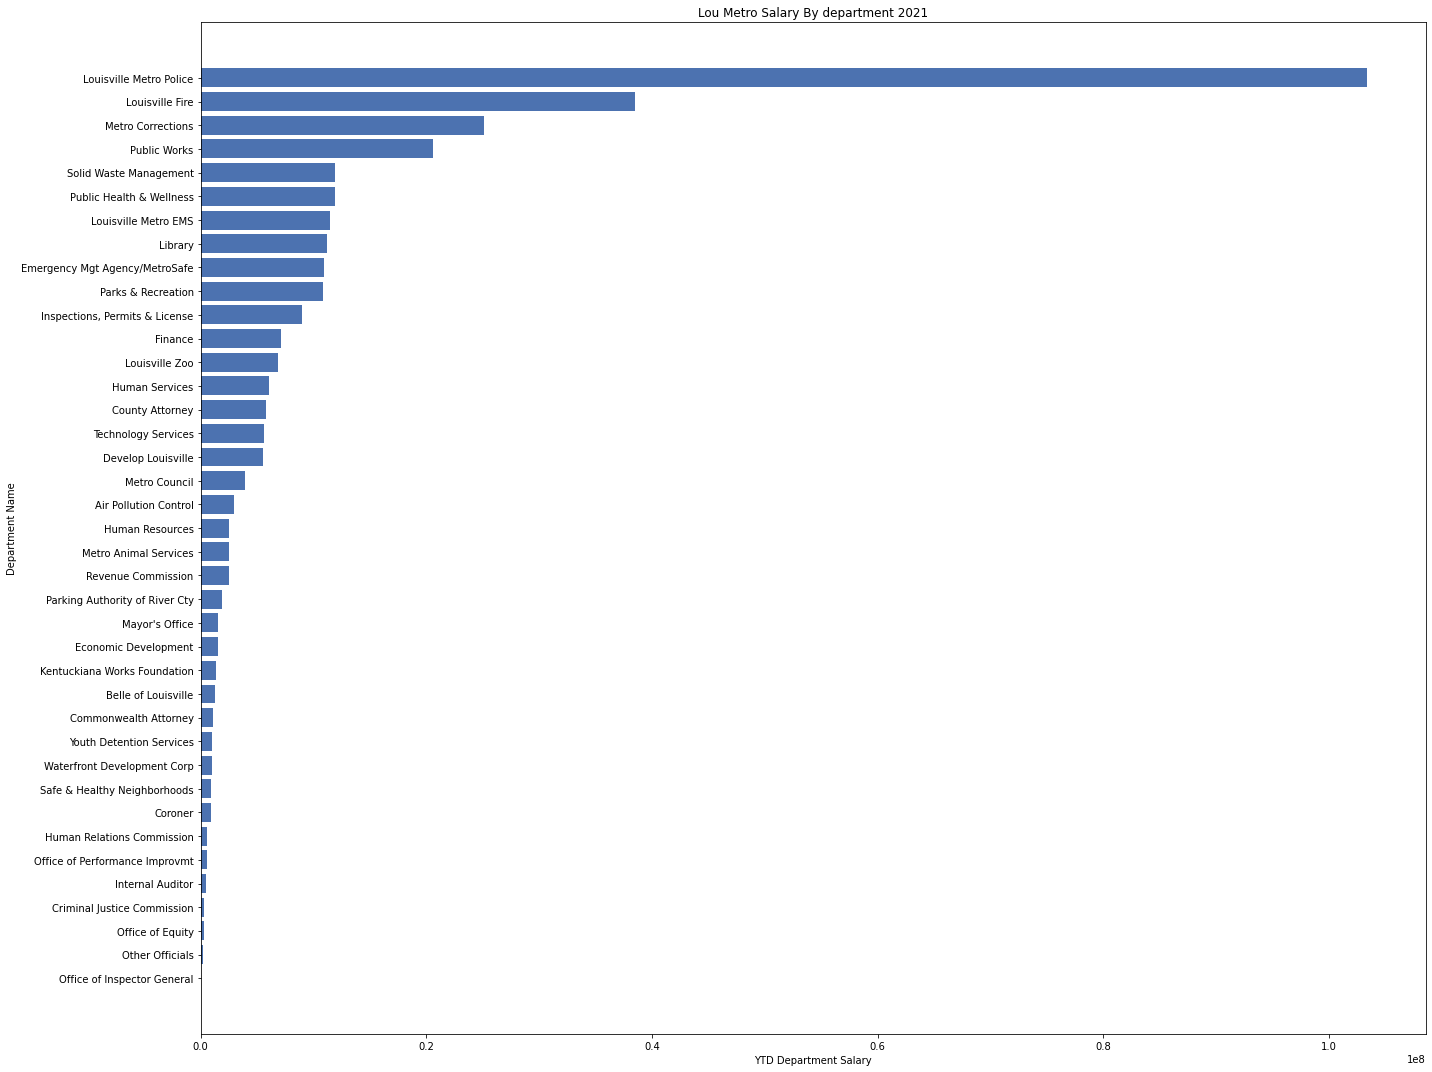

In [133]:
plt.style.use('seaborn-deep')
plt.figure(figsize= (20,15))
plt.barh('Department', 'YTD_Total', data = df)
plt.ylabel('Department Name')
plt.xlabel('YTD Department Salary')
plt.title('Lou Metro Salary By department 2021')
plt.tight_layout()
plt.show()

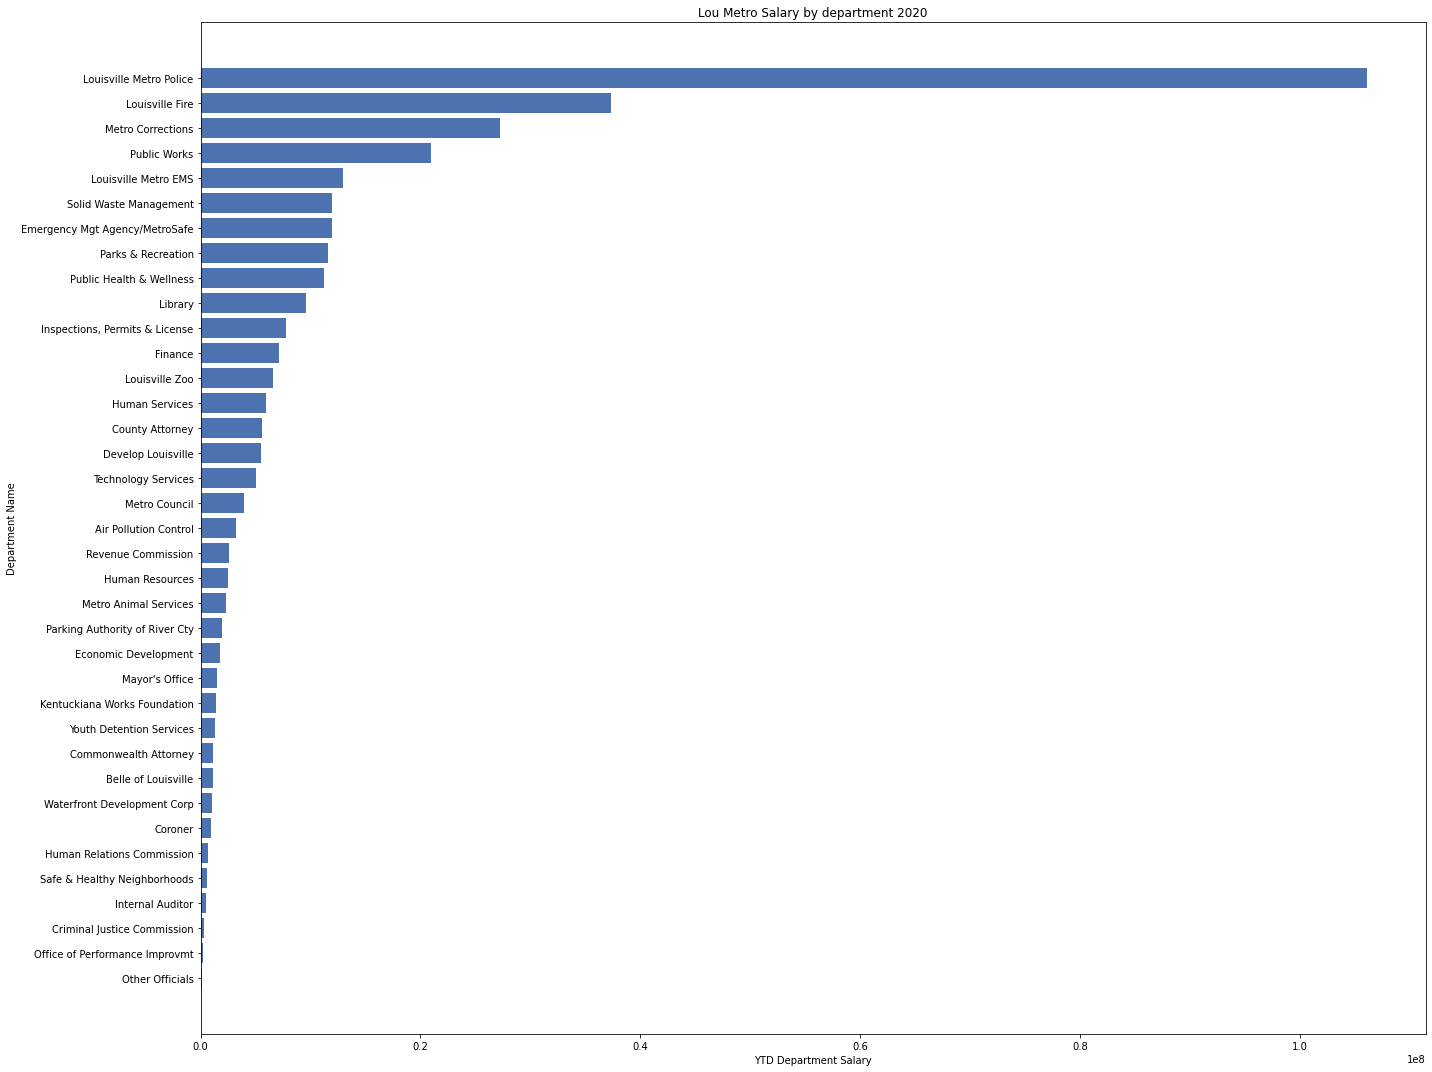

In [134]:
plt.style.use('seaborn-deep')
plt.figure(figsize= (20,15))
plt.barh('Department', 'YTD_Total', data = df2)
plt.ylabel('Department Name')
plt.xlabel('YTD Department Salary')
plt.title('Lou Metro Salary by department 2020')
plt.tight_layout()
# plt.set_xticklabels(xlabels)
plt.show()

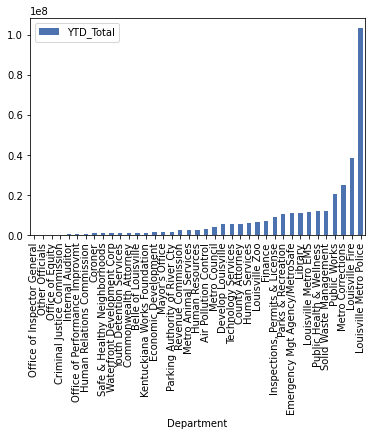

In [135]:
df.plot.bar(x='Department', y='YTD_Total', rot='vertical')
